In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from data_setup import integer_mapping, integer_training_setup, oneHotEncoder_setup

## Data Overview

In [13]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')
df

buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

In [14]:
df = integer_mapping(df)
df

buying  maint  doors  persons  lug_boot  safety  class
0          4      4      2        2         1       1  unacc
1          4      4      2        2         1       2  unacc
2          4      4      2        2         1       3  unacc
3          4      4      2        2         2       1  unacc
4          4      4      2        2         2       2  unacc
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      5        5         2       2   good
1724       1      1      5        5         2       3  vgood
1725       1      1      5        5         3       1  unacc
1726       1      1      5        5         3       2   good
1727       1      1      5        5         3       3  vgood

[1728 rows x 7 columns]

In [15]:
df.dtypes

buying       int64
maint        int64
doors        int64
persons      int64
lug_boot     int64
safety       int64
class       object
dtype: object

In [16]:
df.describe()

buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     3.500000     3.666667     2.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       1.000000     1.000000     2.000000     2.000000     1.000000   
25%       1.750000     1.750000     2.750000     2.000000     1.000000   
50%       2.500000     2.500000     3.500000     4.000000     2.000000   
75%       3.250000     3.250000     4.250000     5.000000     3.000000   
max       4.000000     4.000000     5.000000     5.000000     3.000000   

            safety  
count  1728.000000  
mean      2.000000  
std       0.816733  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       3.000000

In [35]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [36]:
df.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

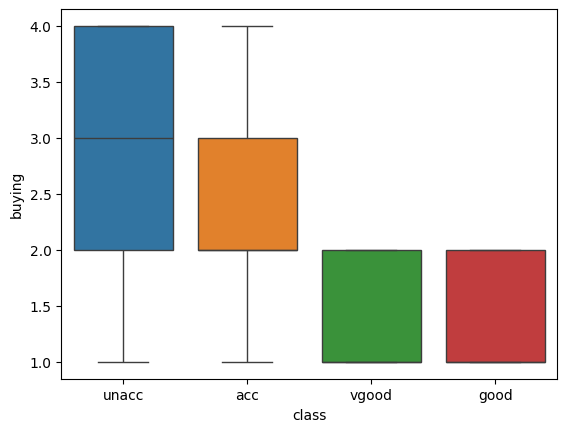

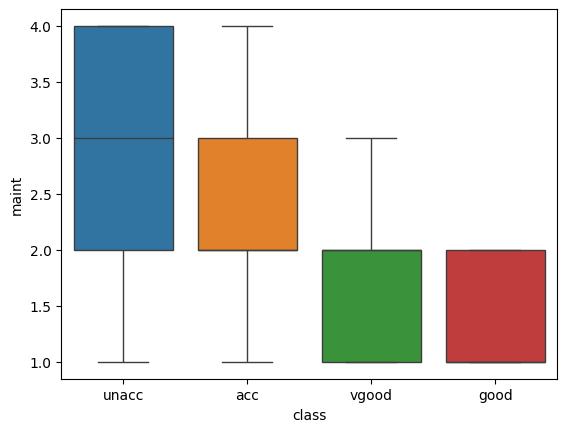

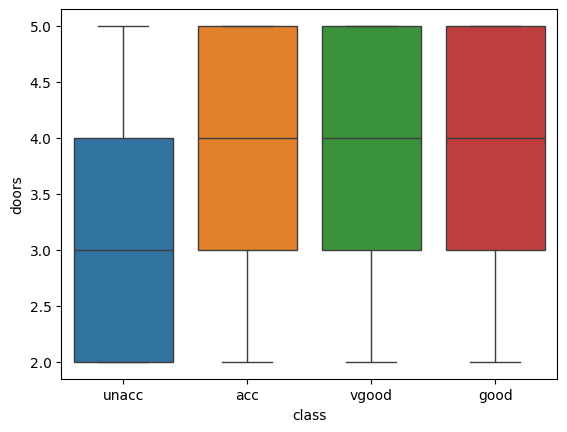

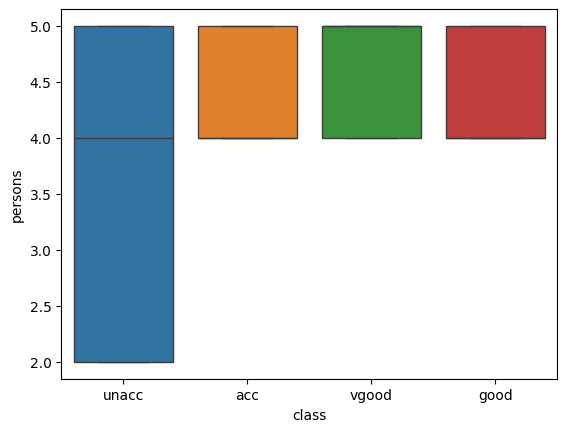

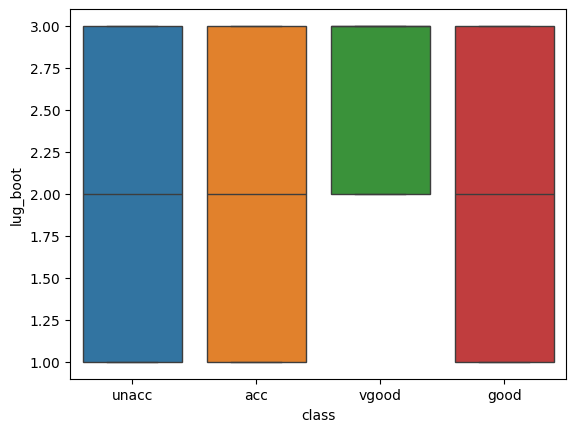

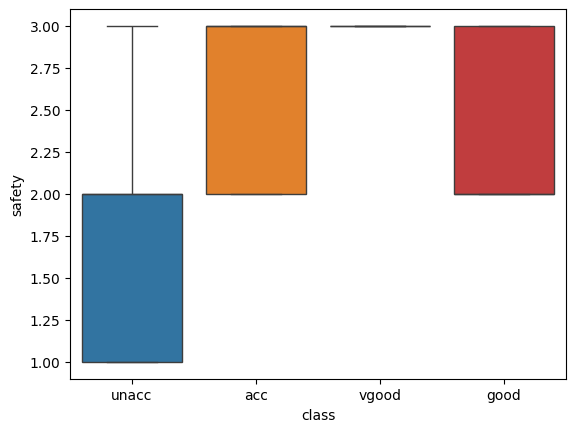

In [17]:
for i in df.columns[:-1]:
    sns.boxplot(x='class',y=i,data=df,hue='class')
    plt.show()

In [18]:
for i in df.columns[:-1]:
    fig = px.box(df,x='class',y=i,color='class')
    fig.show()

## Integer Mapping Decision Tree Classifier

In [19]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9653179190751445
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.90      0.94        83
        good       0.56      0.91      0.69        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



In [24]:
from sklearn import tree
plt.figure(figsize=(40,30), dpi=400)
tree.plot_tree(model,feature_names=list(df.columns[:-1]),class_names=['acc','good','unacc','vgood'],filled=True)
plt.show()

In [22]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_5 <= 1.50
|   |--- class: unacc
|--- feature_5 >  1.50
|   |--- feature_3 <= 3.00
|   |   |--- class: unacc
|   |--- feature_3 >  3.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |   |   |   |   |--- class: good
|   |   | 

## OneHot Encoder Decision Tree Classifier

In [23]:
df_oneHot = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [25]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9566473988439307
Classification Report:
               precision    recall  f1-score   support

         acc       0.99      0.87      0.92        83
        good       0.62      0.91      0.74        11
       unacc       0.98      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



## Integer Mapping Random Forest Classifier

In [26]:
X_train, X_test, y_train, y_test = integer_training_setup(df)

rfc_model = RandomForestClassifier(n_estimators=100, random_state=302)
rfc_model.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rfc_y_pred)
report = classification_report(y_test, rfc_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9739884393063584
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.93      0.95        83
        good       0.65      1.00      0.79        11
       unacc       1.00      1.00      1.00       235
       vgood       0.93      0.82      0.88        17

    accuracy                           0.97       346
   macro avg       0.89      0.94      0.90       346
weighted avg       0.98      0.97      0.98       346



## OneHot Encoder Random Forest Classifier

In [27]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

rf_model = RandomForestClassifier(n_estimators=100, random_state=302)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9624277456647399
Classification Report:
               precision    recall  f1-score   support

         acc       0.95      0.92      0.93        83
        good       0.56      0.82      0.67        11
       unacc       1.00      1.00      1.00       235
       vgood       0.87      0.76      0.81        17

    accuracy                           0.96       346
   macro avg       0.84      0.87      0.85       346
weighted avg       0.97      0.96      0.96       346



##  Integer Mapping - K-Nearest Neighbor Classifier

In [46]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_KNN = integer_mapping(df_KNN)

X_train, X_test, y_train, y_test = integer_training_setup(df_KNN)

knn  = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9566473988439307
Classification Report:
               precision    recall  f1-score   support

         acc       0.94      0.90      0.92        83
        good       0.55      1.00      0.71        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.65      0.79        17

    accuracy                           0.96       346
   macro avg       0.87      0.89      0.85       346
weighted avg       0.97      0.96      0.96       346



## OneHot Encoder K-Nearest Neighbor Classifier

In [54]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_KNN)

knn  = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8988439306358381
Classification Report:
               precision    recall  f1-score   support

         acc       0.83      0.76      0.79        83
        good       0.60      0.55      0.57        11
       unacc       0.93      0.99      0.96       235
       vgood       0.91      0.59      0.71        17

    accuracy                           0.90       346
   macro avg       0.82      0.72      0.76       346
weighted avg       0.90      0.90      0.89       346



## K-Fold Cross Validation - Decision Tree - Integer Mapping

In [47]:
df_KF_DT = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [48]:
df_KF_DT = integer_mapping(df_KF_DT)

X = df_KF_DT.drop('class',axis=1)
y = df_KF_DT['class']

kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.98265896 0.98265896 0.98265896 0.96521739 0.9826087 ]
Mean CV Accuracy: 0.9791605931138477
Standard Deviation of CV Accuracy: 0.006971628084159133


## K-Fold Cross Validation - RandomForestClassifier - Integer Mapping

In [49]:
df_KF_RFC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [50]:
df_KF_RFC = integer_mapping(df_KF_RFC)

X = df_KF_RFC.drop('class',axis=1)
y = df_KF_RFC['class']

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")


CV Accuracy scores: [0.97398844 0.98265896 0.97109827 0.97681159 0.98550725]
Mean CV Accuracy: 0.9780129010639189
Standard Deviation of CV Accuracy: 0.005351685363097233


## K-Fold Cross Validation - K-Nearest Neighbor - Integer Mapping

In [53]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_KNN = integer_mapping(df_KNN)

X = df_KNN.drop('class',axis=1)
y = df_KNN['class']

kf = KFold(n_splits=5, shuffle=True, random_state=302)

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.9566474  0.94508671 0.95086705 0.95942029 0.96811594]
Mean CV Accuracy: 0.9560274775906844
Standard Deviation of CV Accuracy: 0.007802011822475091


## K-Fold Cross Validation - Decision Tree - OneHot Encoder

In [51]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_DT.drop('class', axis=1))
y = df_KF_DT['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.97976879 0.97109827 0.97976879 0.96521739 0.96521739]
Mean CV Accuracy: 0.9722141241517971
Standard Deviation of CV Accuracy: 0.006531454904514086


## K-Fold Cross Validation - Random Forest Classifier - OneHot Encoder

In [52]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_RFC.drop('class', axis=1))
y = df_KF_RFC['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.96242775 0.96242775 0.94219653 0.95072464 0.95362319]
Mean CV Accuracy: 0.9542799698416686
Standard Deviation of CV Accuracy: 0.007640074940136635


## K-Fold Cross Validation - K-Nearest Neighbor - OneHot Encoder

In [56]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

encoder = OneHotEncoder()
X = encoder.fit_transform(df_KNN.drop('class', axis=1))
y = df_KNN['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

kf = KFold(n_splits=5, shuffle=True, random_state=302)

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.87572254 0.8583815  0.87283237 0.86956522 0.86956522]
Mean CV Accuracy: 0.8692133701935159
Standard Deviation of CV Accuracy: 0.005882914865511961
